In [3]:
import seaborn as sns
import pandas as pd
import numpy
pd.set_option('display.max_rows',1000)

df = pd.read_excel(io="/home/erika.kvalem/Documents/Relecov/relecov_qc_exercise/files/QC_final.xlsx", sheet_name="secuenciacion")


In [4]:
df.describe()

,Read lenght,Number samples in run
count,308.000000,377.000000
mean,218.987013,90.294430
std,194.617573,106.893792
min,36.000000,8.000000
25%,150.000000,24.000000
50%,200.000000,48.000000
75%,250.000000,96.000000
max,1200.000000,384.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 16 columns):
 #   Column                                                                Non-Null Count  Dtype         
---  ------                                                                --------------  -----         
 0   ID                                                                    400 non-null    object        
 1   Sample ID                                                             400 non-null    object        
 2   Sequencing date                                                       396 non-null    datetime64[ns]
 3   Enrichment protocol                                                   376 non-null    object        
 4   Amplicon protocol                                                     396 non-null    object        
 5   Amplicon version                                                      376 non-null    object        
 6   variable_amplicon                         

In [51]:
df_towork = df[['ID', 'Sample ID','library_variable','Sequencing platforms (Illumina, Nanopore, IonTorrent, PacBio, other)','variable_amplicon']]

In [52]:
df_towork = df_towork.loc[df_towork["Sample ID"] =="#1"]

In [53]:
df_towork.rename(columns={"Sequencing platforms (Illumina, Nanopore, IonTorrent, PacBio, other)": "Sequencing Platforms"},inplace = True)


In [54]:
df_towork.columns

Index(['ID', 'Sample ID', 'library_variable', 'Sequencing Platforms',
       'variable_amplicon'],
      dtype='object')

In [55]:
df_towork

,ID,Sample ID,library_variable,Sequencing Platforms,variable_amplicon
0,COD_2102,#1,Ion Xpress,Ion Torrent S5,AmpliSeq Ion AmpliSeq™ SARS‑CoV‑2 Research Panel
10,COD_2103,#1,ABL_DeepChek NGS,Illumina iSeq 100,ARTIC v3
20,COD_2104,#1,Ion AmpliSeq Kit for Chef DL8,Ion Torrent S5 XL,AmpliSeq SARS‑CoV‑2 Insight Panel
30,COD_2105,#1,NEBNext® Fast DNA Library Prep Set for Ion Tor...,Ion Torrent S5,ARTIC v4
40,COD_2106,#1,Oxford Nanopore Sequencing Kit,MinION,ARTIC v4
50,COD_2106_2,#1,Illumina DNA prep,Illumina MiSeq,ARTIC v4
60,COD_2107,#1,Illumina DNA Prep Tagmentation,Illumina MiSeq,ARTIC v4
70,COD_2107_2,#1,Oxford Nanopore Sequencing Kit SQK-RBK110-96,MinION,Midnight
80,COD_2108,#1,Nextera XT,Illumina MiSeq,ARTIC v4
90,COD_2109,#1,Illumina DNA Prep Tagmentation,Illumina NextSeq,ARTIC v3


# Sequencing platforms

In [11]:
df_towork

,ID,Sample ID,library_variable,Sequencing Platforms,Enrichment protocol
0,COD_2102,#1,Ion Xpress,Ion Torrent S5,Amplicon
10,COD_2103,#1,ABL_DeepChek NGS,Illumina iSeq 100,Amplicon
20,COD_2104,#1,Ion AmpliSeq Kit for Chef DL8,Ion Torrent S5 XL,Amplicon
30,COD_2105,#1,NEBNext® Fast DNA Library Prep Set for Ion Tor...,Ion Torrent S5,Amplicon
40,COD_2106,#1,Oxford Nanopore Sequencing Kit,MinION,Amplicon
50,COD_2106_2,#1,Illumina DNA prep,Illumina MiSeq,NaN
60,COD_2107,#1,Illumina DNA Prep Tagmentation,Illumina MiSeq,Amplicon
70,COD_2107_2,#1,Oxford Nanopore Sequencing Kit SQK-RBK110-96,MinION,Amplicon
80,COD_2108,#1,Nextera XT,Illumina MiSeq,No enrichment
90,COD_2109,#1,Illumina DNA Prep Tagmentation,Illumina NextSeq,Amplicon


In [12]:
df_towork["Sequencing Platforms"].value_counts()

Illumina MiSeq                                17
Ion Torrent S5                                 6
Illumina iSeq 100                              4
MinION                                         3
Illumina NextSeq                               2
Ion Torrent S5 XL                              1
Illumina NextSeq550 – High Output flowcell     1
Ion Torrent PGM                                1
Illumina NovaSeq 6000                          1
MiSeq (Illumina)                               1
Illumina NextSeq 550                           1
Illumina iSeq                                  1
Ion Torrent                                    1
Name: Sequencing Platforms, dtype: int64

In [338]:
enrichment = df_towork.drop(columns = "library_variable")

In [354]:
enrichment.rename(columns = {"ID":"Count"}, inplace = True)

In [355]:
enrichment

,Count,Sequencing Platforms,Enrichment protocol
0,COD_2102,Ion Torrent S5,Amplicon
10,COD_2103,Illumina iSeq,Amplicon
20,COD_2104,Ion Torrent S5,Amplicon
30,COD_2105,Ion Torrent S5,Amplicon
40,COD_2106,MinION,Amplicon
50,COD_2106_2,Illumina MiSeq,NaN
60,COD_2107,Illumina MiSeq,Amplicon
70,COD_2107_2,MinION,Amplicon
80,COD_2108,Illumina MiSeq,No enrichment
90,COD_2109,Illumina NextSeq,Amplicon


In [356]:
enrichment.drop(columns = "Sample ID", inplace = True)

KeyError: "['Sample ID'] not found in axis"

In [357]:
enrichment_pint = enrichment.groupby(["Enrichment protocol","Sequencing Platforms"]).count()

In [358]:
enrichment_pint

Count
Enrichment protocol Sequencing Platforms        
Amplicon            Illumina MiSeq            15
                    Illumina NextSeq           4
                    Illumina NovaSeq 6000      1
                    Illumina iSeq              5
                    Ion Torrent PGM            1
                    Ion Torrent S5             8
                    MinION                     2
No enrichment       Illumina MiSeq             1
                    MinION                     1

In [393]:
d = {"Amplicon":36, "No enrichment":2}
enrichment_df = pd.DataFrame(data=d, index=[0])
enrichment_df 

,Amplicon,No enrichment
0,36,2


In [373]:

enrichment_pint.reset_index(inplace=True)
df_pintar_en= enrichment_pint.rename(columns = {'Sequencing Platforms':'Sequencing Platforms', "Enrichment protocol":"Enrichment protocol"})

In [38]:
df_out = pd.read_excel('output2.xlsx', index_col=None)  

In [39]:
df_out

,Sequencing Platforms,ID
0,Illumina iSeq,5
1,Illumina MiSeq,18
2,Illumina NextSeq,4
3,Illumina NovaSeq 6000,1
4,Ion Torrent S5,8
5,Ion Torrent PGM,1
6,MinION,3


Text(0.5, 0, 'totalCount')

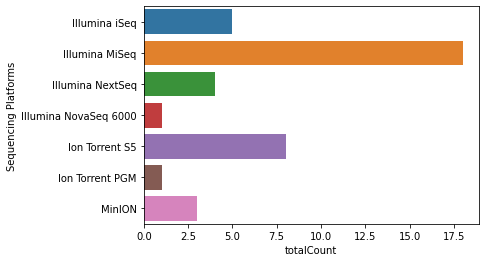

In [44]:
import seaborn
ax = sns.barplot(y="Sequencing Platforms", x="ID", data=df_out)
ax.set_xlabel('totalCount')

In [385]:
df_pintar_en

,index,Enrichment protocol,Count
0,0,Amplicon,15
1,1,Amplicon,4
2,2,Amplicon,1
3,3,Amplicon,5
4,4,Amplicon,1
5,5,Amplicon,8
6,6,Amplicon,2
7,7,No enrichment,1
8,8,No enrichment,1


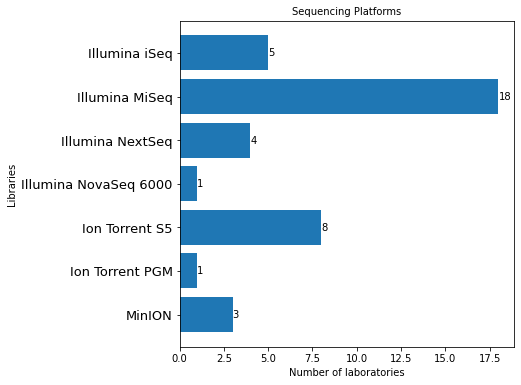

In [47]:
import matplotlib.pyplot as plt
import numpy as np

from matplotlib.pyplot import figure


# Fixing random state for reproducibility


#plt.rcdefaults()
fig, ax = plt.subplots()

fig.set_size_inches(6, 6)
# Example data
protocol = df_out["Sequencing Platforms"]
y_pos = np.arange(len(protocol))
number =df_out["ID"]


ax.barh(y_pos, number, align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(protocol,fontsize = 13)
ax.bar_label(ax.containers[0],fontsize=10)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_ylabel('Libraries', fontsize = 10)
ax.set_xlabel('Number of laboratories', fontsize = 10)
ax.set_title('Sequencing Platforms', fontsize = 10)
plt.show()




fig.savefig('diagnostic_protocol_all.png',bbox_inches='tight')   # save the figure to file
plt.close(fig)    # close the figure window



In [333]:
df_towork["Sequencing Platforms"].replace("Illumina NextSeq 550","Illumina NextSeq",inplace = True)

In [31]:
a_rep_plat2 = df_towork.groupby(["Sequencing Platforms"]).count()

In [34]:
a_rep_plat2.to_excel("output2.xlsx")

/tmp/ipykernel_6740/405615433.py:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(protocol,fontsize = 13)


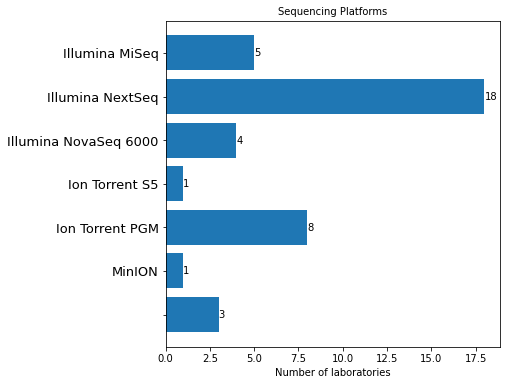

In [45]:
import matplotlib.pyplot as plt
import numpy as np

from matplotlib.pyplot import figure


# Fixing random state for reproducibility


#plt.rcdefaults()
fig, ax = plt.subplots()

fig.set_size_inches(6, 6)
# Example data
protocol = df_out["Sequencing Platforms"]
y_pos = np.arange(len(protocol))
number = df_out["ID"]


ax.barh(y_pos, number, align='center')
#ax.set_yticks(y_pos)
ax.set_yticklabels(protocol,fontsize = 13)
ax.bar_label(ax.containers[0],fontsize=10)
ax.invert_yaxis()  # labels read top-to-bottom
#ax.set_ylabel('Libraries', fontsize = 10)
ax.set_xlabel('Number of laboratories', fontsize = 10)
ax.set_title('Sequencing Platforms', fontsize = 10)
plt.show()




fig.savefig('diagnostic_protocol_all.png',bbox_inches='tight')   # save the figure to file
plt.close(fig)    # close the figure window




In [57]:
df_towork["Sequencing Platforms"].value_counts()

Illumina MiSeq                                17
Ion Torrent S5                                 6
Illumina iSeq 100                              4
MinION                                         3
Illumina NextSeq                               2
Ion Torrent S5 XL                              1
Illumina NextSeq550 – High Output flowcell     1
Ion Torrent PGM                                1
Illumina NovaSeq 6000                          1
MiSeq (Illumina)                               1
Illumina NextSeq 550                           1
Illumina iSeq                                  1
Ion Torrent                                    1
Name: Sequencing Platforms, dtype: int64

In [58]:
df_towork["Sequencing Platforms"].replace("MiSeq (Illumina)", "Illumina MiSeq",inplace = True)

In [59]:
df_towork["Sequencing Platforms"].replace("Ion Torrent S5 XL", "Ion Torrent S5",inplace = True)

In [60]:
df_towork["Sequencing Platforms"].replace("Ion Torrent", "Ion Torrent S5",inplace = True)

In [61]:
df_towork["Sequencing Platforms"].replace("Illumina iSeq 100", "Illumina iSeq",inplace = True)

In [62]:
df_towork["Sequencing Platforms"].replace("Illumina NextSeq 550", "Illumina NextSeq",inplace = True)

In [63]:
df_towork["Sequencing Platforms"].replace("Illumina NextSeq550 – High Output flowcell", "Illumina NextSeq",inplace = True)

In [64]:
df_towork["Sequencing Platforms"].value_counts()

Illumina MiSeq           18
Ion Torrent S5            8
Illumina iSeq             5
Illumina NextSeq          4
MinION                    3
Ion Torrent PGM           1
Illumina NovaSeq 6000     1
Name: Sequencing Platforms, dtype: int64

# Libraries

In [62]:
df_towork["library_variable"].value_counts()

Illumina DNA Prep Tagmentation                                 12
Nextera XT                                                      4
Ion AmpliSeq Kit for Chef DL8                                   2
Oxford Nanopore Sequencing Kit                                  2
Illumina DNA prep                                               2
Illumina  Covidseq Kit                                          2
Ion Xpress                                                      1
ioncode                                                         1
NEBNext® ARTIC SARS-CoV-2 FS Library Prep Kit (Illumina®)       1
AmpliSeq DL8                                                    1
Ion AmpliSeq Kit                                                1
Nextera DNA Flex                                                1
ABL DeepChek® Assay WG SC2 V1                                   1
Illumina Covidseq Kit                                           1
ViroKey SQ FLEX SARS-CoV-2 Genotyping Assay (RUO)               1
NEBNext® A

In [132]:
df_towork["library_variable_new"].value_counts()

DNA Prep Tagmentation                                      14
AmpliSeq DL8                                                5
Nextera XT                                                  4
Covidseq Kit                                                4
Oxford Nanopore Sequencing Kit                              3
Ion Xpress                                                  1
ABL_DeepChek NGS                                            1
NEBNext® Fast DNA Library Prep Set for Ion Torrent™         1
NEBNext® Ultra™ II FS DNA Library Prep Kit for Illumina     1
ViroKey SQ FLEX SARS-CoV-2 Genotyping Assay (RUO)           1
NEBNext® ARTIC SARS-CoV-2 FS                                1
Ioncode                                                     1
ABL DeepChek® Assay WG SC2 V1                               1
Nextera DNA Flex                                            1
NEBNext® Ultra™ II FS DNA Library Prep Kit                  1
Name: library_variable_new, dtype: int64

In [87]:
df_towork["library_variable_new"] = df_towork["library_variable"]

<ipython-input-87-a87d10f5dd28>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_towork["library_variable_new"] = df_towork["library_variable"]


In [65]:
df_towork

,ID,Sample ID,library_variable,Sequencing Platforms,variable_amplicon
0,COD_2102,#1,Ion Xpress,Ion Torrent S5,AmpliSeq Ion AmpliSeq™ SARS‑CoV‑2 Research Panel
10,COD_2103,#1,ABL_DeepChek NGS,Illumina iSeq,ARTIC v3
20,COD_2104,#1,Ion AmpliSeq Kit for Chef DL8,Ion Torrent S5,AmpliSeq SARS‑CoV‑2 Insight Panel
30,COD_2105,#1,NEBNext® Fast DNA Library Prep Set for Ion Tor...,Ion Torrent S5,ARTIC v4
40,COD_2106,#1,Oxford Nanopore Sequencing Kit,MinION,ARTIC v4
50,COD_2106_2,#1,Illumina DNA prep,Illumina MiSeq,ARTIC v4
60,COD_2107,#1,Illumina DNA Prep Tagmentation,Illumina MiSeq,ARTIC v4
70,COD_2107_2,#1,Oxford Nanopore Sequencing Kit SQK-RBK110-96,MinION,Midnight
80,COD_2108,#1,Nextera XT,Illumina MiSeq,ARTIC v4
90,COD_2109,#1,Illumina DNA Prep Tagmentation,Illumina NextSeq,ARTIC v3


In [66]:
df_towork_filtered = df_towork[["ID","Sequencing Platforms","variable_amplicon"]]

In [164]:
df_towork_filtered2 = df_towork[["ID","library_variable_new","Sequencing Platforms"]]

In [208]:
a_rep = df_towork_filtered.groupby(["library_variable_new"]).count()

In [209]:
a_rep

,ID
library_variable_new,
ABL DeepChek® Assay WG SC2 V1,1
ABL_DeepChek NGS,1
AmpliSeq DL8,5
Covidseq Kit,4
DNA Prep Tagmentation,14
Ion Xpress,1
Ioncode,1
NEBNext® ARTIC SARS-CoV-2 FS,1
NEBNext® Fast DNA Library Prep Set for Ion Torrent™,1


In [259]:
a_rep2= df_towork_filtered2.groupby(["library_variable_new","Sequencing Platforms"]).count()

In [260]:
a_rep2
a_rep2.reset_index(inplace=True)
df_pintar= a_rep2.rename(columns = {'Sequencing Platforms':'Sequencing Platforms'})

In [263]:
df_pintar.to_excel("output.xlsx")


/home/erika.kvalem/miniconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:88: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  self._figure.tight_layout(*args, **kwargs)


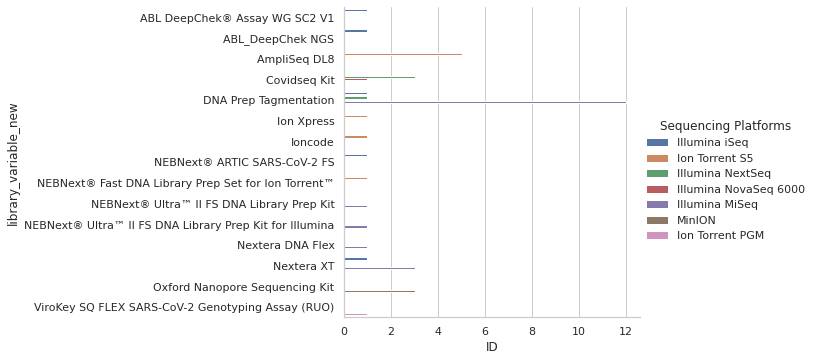

In [230]:
ax = sns.catplot(x="ID", y="library_variable_new", hue="Sequencing Platforms", kind="bar", data=df_pintar)


In [256]:

df_pintar.iloc[6] = df_pintar.iloc[8]


In [248]:
df_pintar.drop(index=5,inplace = True)

In [257]:
df_pintar

,library_variable_new,Sequencing Platforms,ID
0,ABL DeepChek® Assay WG SC2 V1,Illumina iSeq,1
1,ABL_DeepChek NGS,Illumina iSeq,1
2,Nextera XT,Illumina iSeq,1
3,DNA Prep Tagmentation,Illumina iSeq,1
4,DNA Prep Tagmentation,Illumina MiSeq,12
6,DNA Prep Tagmentation,Illumina NextSeq,1
8,NEBNext® Fast DNA Library Prep Set for Ion Tor...,Ion Torrent S5,1
9,Ioncode,Ion Torrent S5,1
11,NEBNext® Fast DNA Library Prep Set for Ion Tor...,Ion Torrent S5,1
12,NEBNext® Ultra™ II FS DNA Library Prep Kit,Illumina MiSeq,1


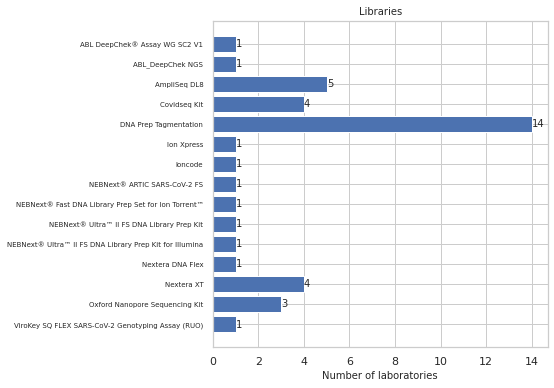

In [197]:
import matplotlib.pyplot as plt
import numpy as np

from matplotlib.pyplot import figure


# Fixing random state for reproducibility


#plt.rcdefaults()
fig, ax = plt.subplots()

fig.set_size_inches(6, 6)
# Example data
protocol = a_rep.index
y_pos = np.arange(len(protocol))
number = a_rep["ID"]


ax.barh(y_pos, number, align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(protocol,fontsize = 7)
ax.bar_label(ax.containers[0],fontsize=10)
ax.invert_yaxis()  # labels read top-to-bottom
#ax.set_ylabel('Libraries', fontsize = 10)
ax.set_xlabel('Number of laboratories', fontsize = 10)
ax.set_title('Libraries', fontsize = 10)
plt.show()




fig.savefig('diagnostic_protocol_all.png',bbox_inches='tight')   # save the figure to file
plt.close(fig)    # close the figure window




In [265]:
import seaborn as sns
import pandas as pd
import numpy
pd.set_option('display.max_rows',1000)

df_excel = pd.read_excel(io="output.xlsx")


In [268]:
df_excel.drop(columns="Unnamed: 0", inplace =True)

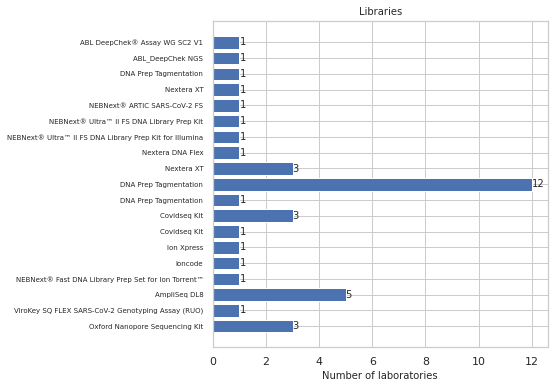

In [273]:
import matplotlib.pyplot as plt
import numpy as np

from matplotlib.pyplot import figure


# Fixing random state for reproducibility


#plt.rcdefaults()
fig, ax = plt.subplots()

fig.set_size_inches(6, 6)
# Example data
protocol = df_excel["library_variable_new"]
y_pos = np.arange(len(protocol))
number = df_excel["ID"]


ax.barh(y_pos, number, align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(protocol,fontsize = 7)
ax.bar_label(ax.containers[0],fontsize=10)
ax.invert_yaxis()  # labels read top-to-bottom
#ax.set_ylabel('Libraries', fontsize = 10)
ax.set_xlabel('Number of laboratories', fontsize = 10)
ax.set_title('Libraries', fontsize = 10)
plt.show()




fig.savefig('libraries.png',bbox_inches='tight')   # save the figure to file
plt.close(fig)    # close the figure window




In [290]:
df_excel.rename(columns ={"ID":"Count"}, inplace = True)

In [291]:
df_excel

,Libraries,Sequencing Platforms,Count
0,ABL DeepChek® Assay WG SC2 V1,Illumina iSeq,1
1,ABL_DeepChek NGS,Illumina iSeq,1
2,DNA Prep Tagmentation,Illumina iSeq,1
3,Nextera XT,Illumina iSeq,1
4,NEBNext® ARTIC SARS-CoV-2 FS,Illumina iSeq,1
5,NEBNext® Ultra™ II FS DNA Library Prep Kit,Illumina MiSeq,1
6,NEBNext® Ultra™ II FS DNA Library Prep Kit for...,Illumina MiSeq,1
7,Nextera DNA Flex,Illumina MiSeq,1
8,Nextera XT,Illumina MiSeq,3
9,DNA Prep Tagmentation,Illumina MiSeq,12


# Protocolo de enriquecimiento

In [74]:
b = df_towork_filtered.groupby(["variable_amplicon","Sequencing Platforms"]).count()

In [76]:
b.to_excel("output2.xlsx")

In [108]:
b_2 = pd.read_excel("output2.xlsx")

In [109]:
b_2.rename(columns = {"variable_amplicon":"Enrichment protocol", "ID":"Count"}, inplace = True)

In [119]:
b_2["Platform + Amplicon protocol"] = b_2["Sequencing Platforms"]+ ", " + b_2["Enrichment protocol"] 

In [120]:
b_2

,Enrichment protocol,Sequencing Platforms,Count,Platform + Amplicon protocol
0,ARTIC v3,Illumina MiSeq,6,"Illumina MiSeq, ARTIC v3"
1,ARTIC v3,Illumina NextSeq,2,"Illumina NextSeq, ARTIC v3"
2,ARTIC v3,Illumina NovaSeq 6000,1,"Illumina NovaSeq 6000, ARTIC v3"
3,ARTIC v3,Illumina iSeq,2,"Illumina iSeq, ARTIC v3"
4,ARTIC v4,Illumina MiSeq,11,"Illumina MiSeq, ARTIC v4"
5,ARTIC v4,Illumina NextSeq,2,"Illumina NextSeq, ARTIC v4"
6,ARTIC v4,Illumina iSeq,2,"Illumina iSeq, ARTIC v4"
7,ARTIC v4,Ion Torrent S5,1,"Ion Torrent S5, ARTIC v4"
8,ARTIC v4,MinION,1,"MinION, ARTIC v4"
9,AmpliSeq,Ion Torrent S5,7,"Ion Torrent S5, AmpliSeq"


In [111]:
b2=b_2.groupby(["Enrichment protocol","Sequencing Platforms"]).count()
b2

Count
Enrichment protocol                Sequencing Platforms        
ARTIC v3                           Illumina MiSeq             1
                                   Illumina NextSeq           1
                                   Illumina NovaSeq 6000      1
                                   Illumina iSeq              1
ARTIC v4                           Illumina MiSeq             1
                                   Illumina NextSeq           1
                                   Illumina iSeq              1
                                   Ion Torrent S5             1
                                   MinION                     1
AmpliSeq                           Ion Torrent S5             1
Midnight                           MinION                     1
NEBNext®                           Illumina MiSeq             1
Vela Diagnostics: ViroKey SQ FLEX  Ion Torrent PGM            1

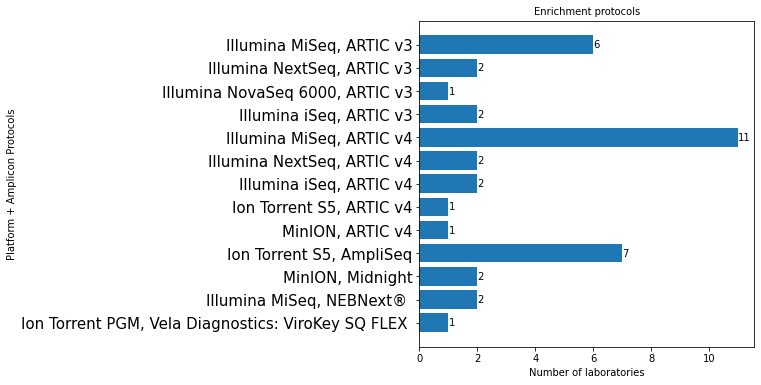

In [127]:
import matplotlib.pyplot as plt
import numpy as np

from matplotlib.pyplot import figure


# Fixing random state for reproducibility


#plt.rcdefaults()
fig, ax = plt.subplots()

fig.set_size_inches(6, 6)
# Example data
protocol = b_2["Platform + Amplicon protocol"]
y_pos = np.arange(len(protocol))
number = b_2["Count"]


ax.barh(y_pos, number, align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(protocol,fontsize = 15)
ax.bar_label(ax.containers[0],fontsize=10)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_ylabel('Platform + Amplicon Protocols', fontsize = 10)
ax.set_xlabel('Number of laboratories', fontsize = 10)
ax.set_title('Enrichment protocols', fontsize = 10)
plt.show()




fig.savefig('enrichment_protocols.png',bbox_inches='tight')   # save the figure to file
plt.close(fig)    # close the figure window




Text(0, 0.5, '')

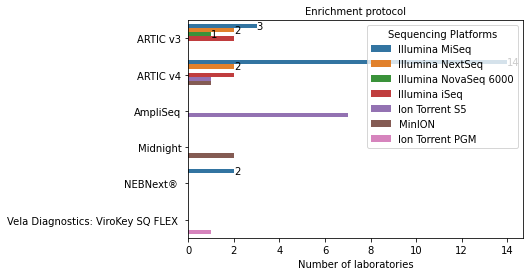

In [92]:
ax = sns.barplot(x="ID", y="variable_amplicon", hue="Sequencing Platforms", data=b_2)
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
ax.bar_label(ax.containers[2])
ax.set_xlabel('Number of laboratories', fontsize = 10)
ax.set_title('Enrichment protocol', fontsize = 10)
ax.set_ylabel('', fontsize = 10)

In [73]:
df_towork_filtered.rename(columns={"ID":"Count"})

,Count,Sequencing Platforms,variable_amplicon
0,COD_2102,Ion Torrent S5,AmpliSeq Ion AmpliSeq™ SARS‑CoV‑2 Research Panel
10,COD_2103,Illumina iSeq,ARTIC v3
20,COD_2104,Ion Torrent S5,AmpliSeq SARS‑CoV‑2 Insight Panel
30,COD_2105,Ion Torrent S5,ARTIC v4
40,COD_2106,MinION,ARTIC v4
50,COD_2106_2,Illumina MiSeq,ARTIC v4
60,COD_2107,Illumina MiSeq,ARTIC v4
70,COD_2107_2,MinION,Midnight
80,COD_2108,Illumina MiSeq,ARTIC v4
90,COD_2109,Illumina NextSeq,ARTIC v3
